Deep Learning Models of Optimization of Mechanical Design 

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib
import matplotlib.pyplot as plt
import pandas as pd
# import seaborn as sns
# import plotly
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from sklearn.metrics import r2_score
# import tensorflow_transform as tft
print(tf.__version__)

2.0.0-beta1


In [2]:
def plot_result(y_test,y_pred):
    figure, axes = plt.subplots(2, 2,figsize = (10,10))
    
    row,col = 0, 0
    r2_00 = r2_score(y_test['Mr_t'], y_pred['Mr_t'])
    axes[row,col].scatter(x=y_test['Mr_t'],y = y_pred['Mr_t'])
    axes[row,col].plot([-6,2],[-6,2])
    axes[row,col].set_title('Mr_t',fontsize = 16)
    axes[row,col].set_xlabel('Test')
    axes[row,col].set_ylabel('Predict')
    axes[row,col].set_aspect('equal', 'box')
    axes[row,col].text(-4,1,'R2 = {:3.3f}'.format(r2_00),fontsize = 16)
    
    row,col = 0, 1
    r2_01 = r2_score(y_test['Mt_t'], y_pred['Mt_t'])
    axes[row,col].scatter(x=y_test['Mt_t'],y = y_pred['Mt_t'])
    axes[row,col].plot([-4,2],[-4,2])
    axes[row,col].set_title('Mt_t',fontsize = 16)
    axes[row,col].set_xlabel('Test')
    axes[row,col].set_ylabel('Predict')
    axes[row,col].set_aspect('equal', 'box')
    axes[row,col].text(-3,1,'R2 = {:3.3f}'.format(r2_01),fontsize = 16)
    
    row,col = 1, 0
    r2_10 = r2_score(y_test['Mr_c'], y_pred['Mr_c'])
    axes[row,col].scatter(x=y_test['Mr_c'],y = y_pred['Mr_c'])
    axes[row,col].plot([-2,10],[-2,10])
    axes[row,col].set_title('Mr_c',fontsize = 16)
    axes[row,col].set_xlabel('Test')
    axes[row,col].set_ylabel('Predict')
    axes[row,col].set_aspect('equal', 'box')
    axes[row,col].text(0,8,'R2 = {:3.3f}'.format(r2_10),fontsize = 16)
    
    row,col = 1, 1
    r2_11 = r2_score(y_test['Mt_c'], y_pred['Mt_c'])
    axes[row,col].scatter(x=y_test['Mr_c'],y = y_pred['Mr_c'])
    axes[row,col].plot([-2,6],[-2,6])
    axes[row,col].set_title('Mt_c',fontsize = 16)
    axes[row,col].set_xlabel('Test')
    axes[row,col].set_ylabel('Predict')
    axes[row,col].set_aspect('equal', 'box')
    axes[row,col].text(0,8,'R2 = {:3.3f}'.format(r2_11),fontsize = 16)

In [3]:
FILE = '5184doe.csv'
df_doe = pd.read_csv(FILE)
# df_doe.head()

In [4]:
# X and y for supervised learning
X = df_doe.drop(['Sample','Mr_t','Mt_t','Mr_c','Mt_c'],axis = 1)
y = df_doe[['Mr_t','Mt_t','Mr_c','Mt_c']]

In [5]:
# Split train and test data
from sklearn.model_selection import train_test_split
X_train_pre, X_test_pre, y_train, y_test = train_test_split(X, y)

In [6]:
# Preprocessing & Normalization
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_pre)
# Train and Test data before feature selection
X_train = scaler.transform(X_train_pre)
X_test = scaler.transform(X_test_pre)

In [7]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_dim=X_train.shape[1]),
#         layers.Dense(64, activation='relu',activity_regularizer = 'l2'),
        layers.Dense(32, activation='relu',activity_regularizer = 'l2'),
        layers.Dense(4)])
    
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    
    model.compile(optimizer=optimizer,
              loss='mse',
              metrics=['mae', 'mse'])
    return model

In [8]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0:
            print('.', end='')

In [9]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error')
    plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
#   plt.ylim([0,5])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
#   plt.ylim([0,20])
    plt.legend()
    plt.show()

In [10]:
model = build_model()

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 132       
Total params: 2,852
Trainable params: 2,852
Non-trainable params: 0
_________________________________________________________________


In [12]:
EPOCHS = 100
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',patience=50, verbose = 1)
history = model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_split = 0.2,
                    verbose=0,callbacks=[early_stop,PrintDot()])

.

In [13]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
95,0.012790,0.056999,0.007890,0.014931,0.062936,0.010262,95
96,0.012694,0.056891,0.007829,0.014054,0.057172,0.009211,96
97,0.012562,0.056157,0.007738,0.016035,0.066512,0.011153,97
98,0.012427,0.055938,0.007639,0.013444,0.057572,0.008697,98
99,0.012572,0.056748,0.007827,0.016286,0.066408,0.011747,99


In [14]:
loss, mae, mse = model.evaluate(X_test, y_test, verbose=0)
print("Testing set Mean Abs Error: {:5.2f}".format(mae))

Testing set Mean Abs Error:  0.06


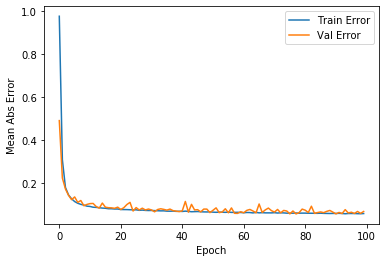

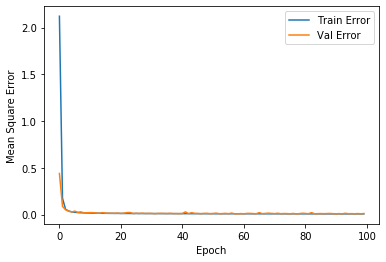

In [15]:
plot_history(history)

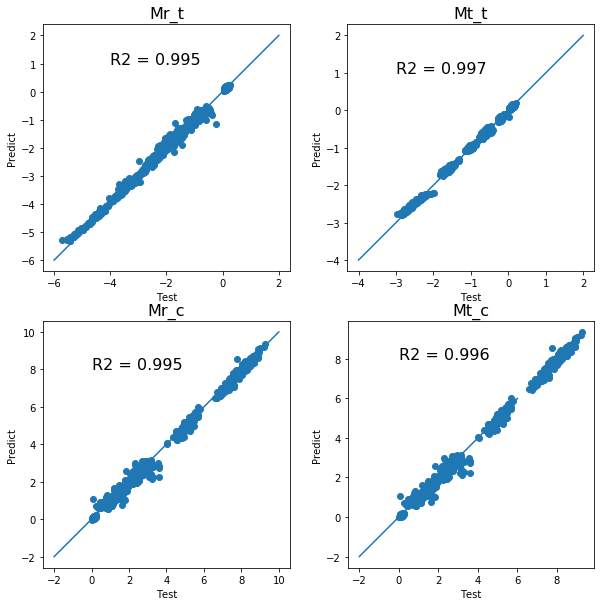

In [16]:
# y_pred = model.predict(X_test)
y_pred = pd.DataFrame(model.predict(X_test), columns = ['Mr_t','Mt_t','Mr_c','Mt_c'])
plot_result(y_test,y_pred)